### Namaster Example 3: Fields

This sample script showcases the use of the NmtField class to define and use observed fields.

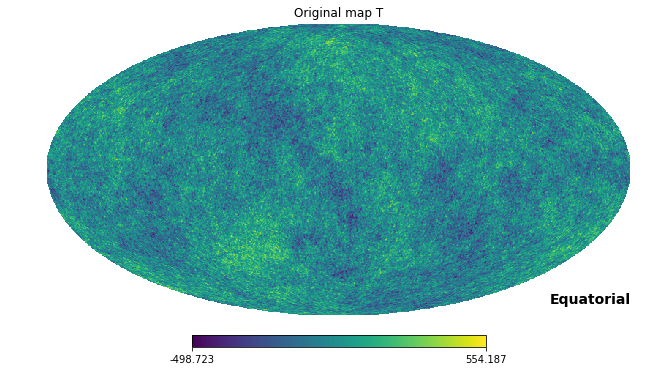

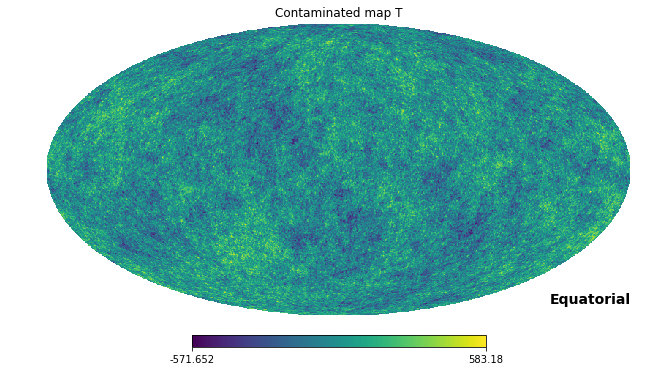

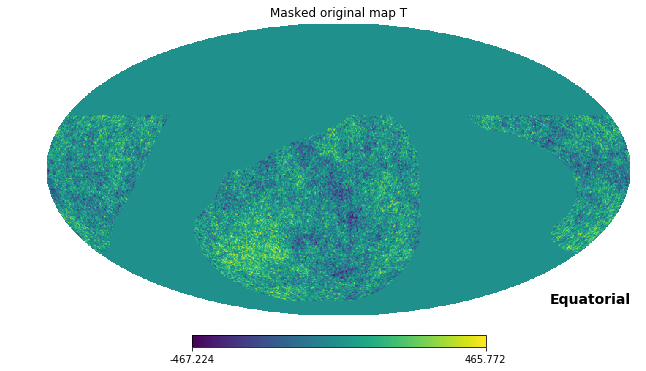

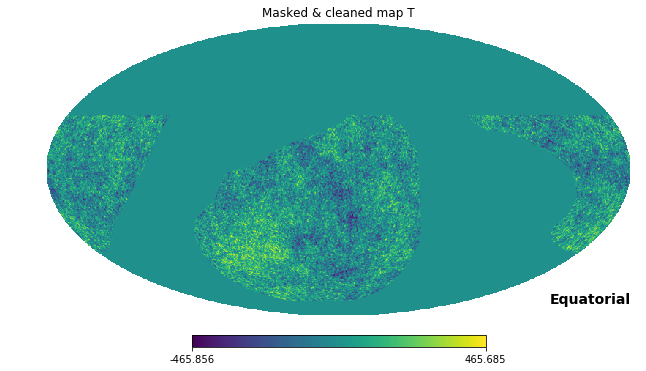

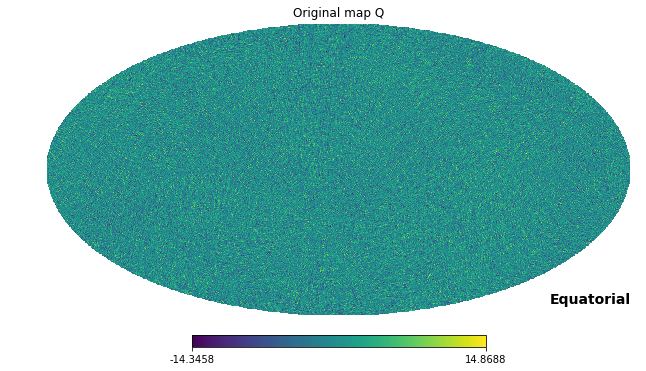

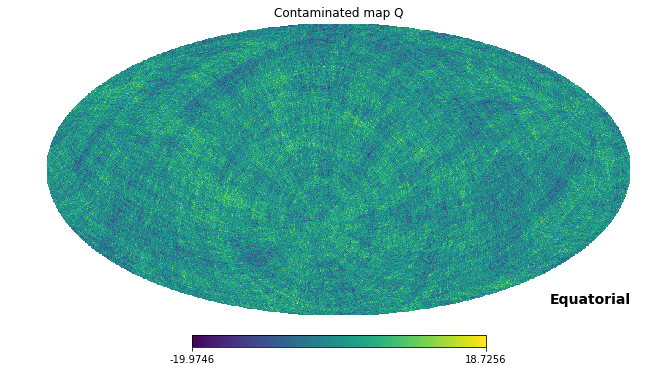

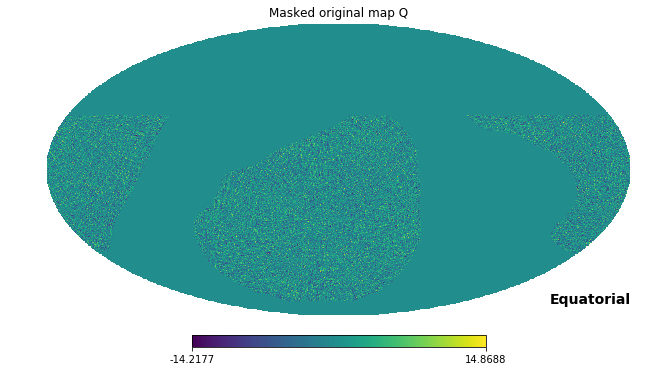

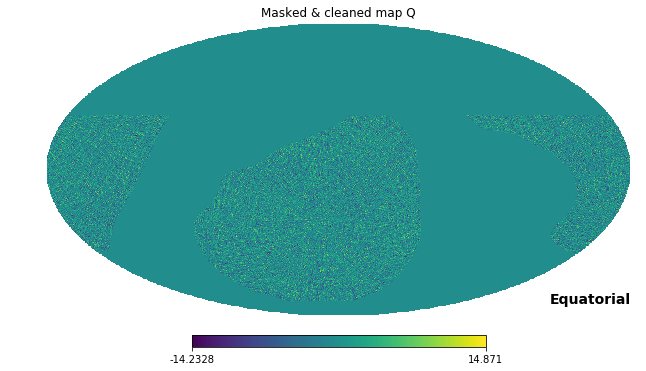

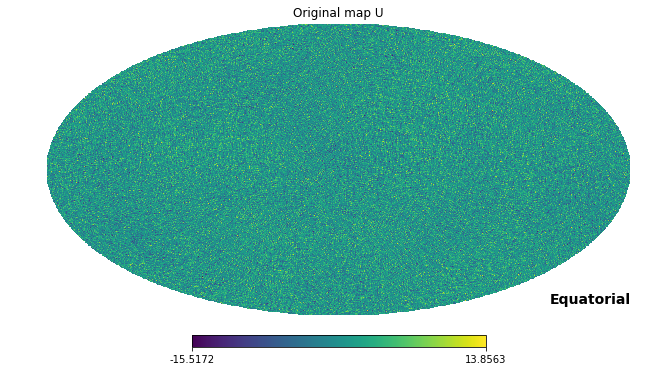

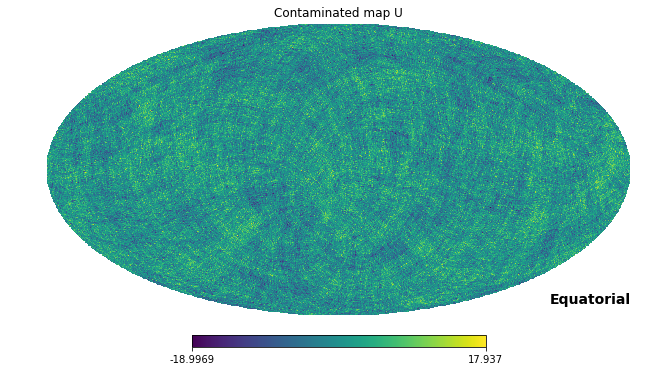

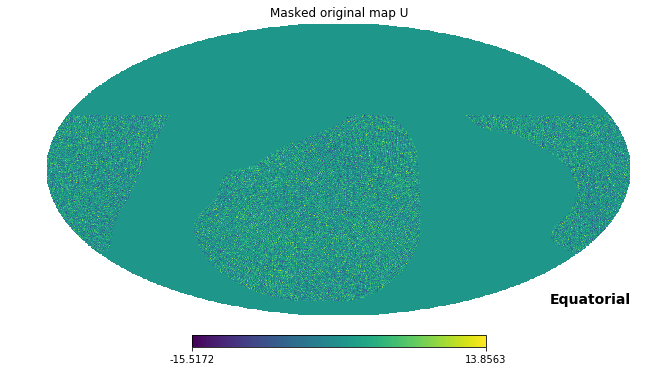

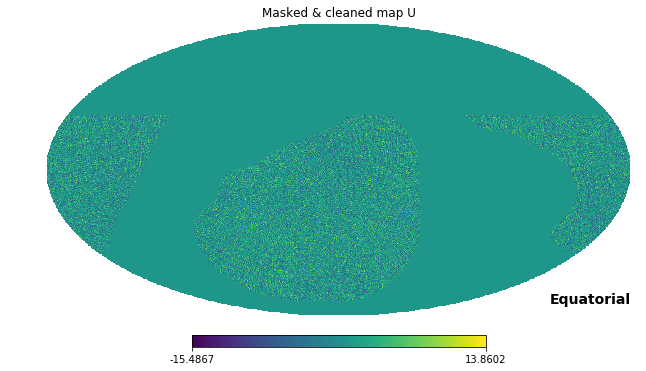

In [3]:
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt

# This script showcases the use of the NmtField structure to store information
# about the fields to be correlated.

# HEALPix map resolution
nside = 256

# # # #  Read input maps
# a) Read and apodize mask
mask = nmt.mask_apodization(hp.read_map("mask.fits", verbose=False),
                            1., apotype="C1")
# b) Read maps
mp_t, mp_q, mp_u = hp.read_map("maps.fits", field=[0, 1, 2], verbose=False)
# c) Read contaminants maps
tm_t, tm_q, tm_u = hp.read_map("temp.fits", field=[0, 1, 2], verbose=False)

# Create fields
# Create spin-0 field with no contaminants
f0_clean = nmt.NmtField(mask, [mp_t])
# Create spin-2 field with no contaminants
f2_clean = nmt.NmtField(mask, [mp_q, mp_u])
# Create contaminated spin-0 field
f0_cont = nmt.NmtField(mask, [mp_t+tm_t], templates=[[tm_t]])
# Create contaminated spin-2 field
f2_cont = nmt.NmtField(mask, [mp_q+tm_q, mp_u+tm_u], templates=[[tm_q, tm_u]])

# Note: when passing "templates", the constructor cleans the maps by finding
# the best-fit linear coefficient that fits the contaminant templates.
# I.e. the maps returned by, e.g. f0_cont.get_maps(), are already cleaned.
#  - f0_clean and f2_clean now hold masked copies of the original maps.
#  - f0_cont and f2_cont now hold masked and ***template-cleaned*** copies of
#    the original maps

# We can verify this by plotting them:
# Spin-0
hp.mollview(mp_t, title='Original map T', coord=['G', 'C'])
hp.mollview(mp_t+tm_t, title='Contaminated map T', coord=['G', 'C'])
hp.mollview(f0_clean.get_maps()[0],
            title='Masked original map T', coord=['G', 'C'])
hp.mollview(f0_cont.get_maps()[0],
            title='Masked & cleaned map T', coord=['G', 'C'])
plt.show()
# Spin-2, Q
hp.mollview(mp_q, title='Original map Q', coord=['G', 'C'])
hp.mollview(mp_q+tm_q, title='Contaminated map Q', coord=['G', 'C'])
hp.mollview(f2_clean.get_maps()[0],
            title='Masked original map Q', coord=['G', 'C'])
hp.mollview(f2_cont.get_maps()[0],
            title='Masked & cleaned map Q', coord=['G', 'C'])
plt.show()
# Spin-2, U
hp.mollview(mp_u, title='Original map U', coord=['G', 'C'])
hp.mollview(mp_u+tm_u, title='Contaminated map U', coord=['G', 'C'])
hp.mollview(f2_clean.get_maps()[1],
            title='Masked original map U', coord=['G', 'C'])
hp.mollview(f2_cont.get_maps()[1],
            title='Masked & cleaned map U', coord=['G', 'C'])
plt.show()